# Fractional Brownian Motion Using Variance Ratio Tests

Consider a sample of $t$ measurements,

$
\begin{align}
X_0, X_1, X_2, \ldots, X_t
\end{align}
$

A test is desired to determine if the series represents brownian motion, which is defined by,

$
\begin{align}
X_t = \sum_{i=1}^t X_i - X_{i-1} = \sum_{i=1}^t \Delta X_{i}
\end{align}
$

where $\Delta X_i$ are independent and identically distributed with distribution,

$
\begin{align}
\Delta X_i \sim \text{Normal}(0, \sigma^2)
\end{align}
$

and

$
\begin{align}
\text{Cov}(\Delta X_i \Delta X_j) = \sigma^2 \delta_{ij}
\end{align}
$

This is the homoscedasticity assumption. Consider the difference,

$
\begin{align}
\Delta X_i(s) = X_i - X_{i+s}
\end{align}
$

So that,

$
\begin{align}
X_t = \sum_{i=1}^n \Delta X_i(s)
\end{align}
$

with $t=ns$. Let, 

$
\begin{align}
\sigma^2(s) = \text{Var}\left(\Delta X_i (s) \right)
\end{align}
$

Recall for brownian motion $\sigma_B^2(t) = \sigma^2t$, it follows that $\sigma^2_B(s) = \sigma^2(1)s$. Consider the ratio,

$
\begin{align}
\text{VR}(s) = \frac{\sigma^2(s)}{\sigma_B^2(s)}
\end{align}
$

where,

$
\begin{align}
&\sigma^2(1) = \frac{1}{t-1} \sum_{i=1}^t \left(X_i - X_{i-1} - \mu \right) \\
&\mu = \frac{1}{t} \left( X_t - X_0 \right)
\end{align}
$

In Lo and Mackinlay, 1988, "Stock market Prices do not Follow Random Walks" it was shown that an unbiased estimator of</br>
$\sigma^2(s)$ is given by,

$
\begin{align}
\sigma^2(s) = \frac{1}{m} \sum_{i=s}^t \left( X_t - X_{t-s} - s\mu \right)^2
\end{align}
$

where,

$
\begin{align}
m = \left(t - s + 1 \right) \left( 1 - \frac{s}{t} \right)
\end{align}
$

If $X_t$ is brownian motion, $\sigma^2(s) = \sigma^2(1)$, $s = \sigma^2_B(s)$. It follows that $\text{VR}(s) = 1$. A test statistic</br>
for this condition is given by,

$
\begin{align}
Z(s) = \frac{\text{VR}(s) - 1}{\sqrt{\theta(s)}}
\end{align}
$

where,

$
\begin{align}
\theta(s) = \frac{2\left( 2s - 1 \right)\left( s - 1 \right)}{3st}
\end{align}
$

and $Z(s) \sim \text{Normal}(0,1)$. This test-statistic was derived assuming homoscedasticity which implies that the</br>
random component is independent of $s$. If instead the random component varies with $s$ heteroscedasticity is assumed.

For this case the test-statistic is given by,

$
\begin{align}
Z^\ast(s) = \frac{\text{VR}(s) - 1}{\sqrt{\theta^\ast (s)}}
\end{align}
$

where,

$
\begin{align}
&\theta^\ast (s) = \sum_{j=1}^{s-1} \left[ \frac{2\left( s - j \right) } {s} \right]^2 \hat{\delta}(j) \\
&\hat{\delta}(j) = \frac{\sum_{i=j+1}^t \left( X_i - X_{i-1} - \mu \right)^2 \left( X_{i-j} - X_{i-j-1} - \mu \right)^2}{\left[ \sum_{i=1}^t \left( X_i - X_{i-1} - \mu \right)^2 \right]^2}
\end{align}
$

The significance test using $Z(s)$ and $Z^\ast(s)$ succeeds if the time series is brownian motion. This test is implemented using two tails and</br> 
the series is brownian motion if it succeeds. A test for $H<0.5$ uses a lower tail test and succeeds if the test for brownian motion fails. Similarly,</br>
A test for $H>0.5$ would use an upper tail test and succeed if the test for brownian motion fails.

## Import

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (FBM, Stats, PlotType, HypTestPlotType, TestHypothesis)
from lib import (curve, comparison, fpoints, hyp_test)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
def create(H_vals, npts):
    params = [{"H": H, "npts": npts} for H in H_vals]
    return FBM.Source.MOTION_FFT.create_parameter_scan(*params)

def lag_var_plot(df, H, npts):
    lag_var = Stats.Func.LAG_VAR.apply(df, s_max=npts/10, npts=100)
    fbm_var = FBM.Func.VAR.apply(lag_var, H=H, nplot=20)
    fpoints(data=lag_var, func=fbm_var, plot_type=PlotType.LOG)

def vr_plot(df, H, npts):
    vr = FBM.Func.VR_STAT.apply(df, s_max=npts/10, npts=100)
    fbm_vr = FBM.Func.VR.apply(vr, H=H, nplot=20)
    fpoints(data=vr, func=fbm_vr, plot_type=PlotType.LOG)
    
def homo_test_stat_plot(s_vals, df, H, test_type=TestHypothesis.TWO_TAIL, sig_level=0.1):
    test_stats = FBM.Func.VR_HOMO_STAT.apply(df, s_vals=s_vals)
    labels = test_stat_labels(s_vals)
    title = f"Homoscedastic Variance Ratio Test: H={H}, σ=1.0"
    hyp_test(test_stats, HypTestPlotType.VR_TEST, title=title, labels=labels, test_type=test_type, sig_level=sig_level)

def hetero_test_stat_plot(s_vals, df, H, test_type=TestHypothesis.TWO_TAIL, sig_level=0.1):
    test_stats = FBM.Func.VR_HETERO_STAT.apply(df, s_vals=s_vals)
    labels = test_stat_labels(s_vals)
    title = f"Heteroscedastic Variance Ratio Test: H={H}, σ=1.0"
    hyp_test(test_stats, HypTestPlotType.VR_TEST, title=title, labels=labels, test_type=test_type, sig_level=sig_level)

def test_stat_labels(s_vals):
    return [f"s={format(s, '4.0f')}" for s in s_vals]

def H_labels(H_vals):
    return [f"H={format(H, '1.2f')}" for H in H_vals]

## $\sigma^2 (s)$ and $\text{VR}(s)$ Verification

The $\sigma^2 (s)$ calculation is verified by comparing with $t^{2H}$. The variance ratio is given by,

$
\begin{align}
\text{VR}(s) = \frac{\sigma^2(s)}{\sigma_B^2(s)}
\end{align}
$

Since $\sigma^2(s) \sim t^{2H}$ and $\sigma_B^2(s) \sim t$ it follows that $\text{VR}(s) \sim t^{2H - 1}$. Here the variance ratio computed from simulations is</br>
compared with $t^{2H-1}$

In [3]:
npts = 2**16
H_vals = [0.5, 0.3, 0.8]
dfs = create(H_vals, npts)

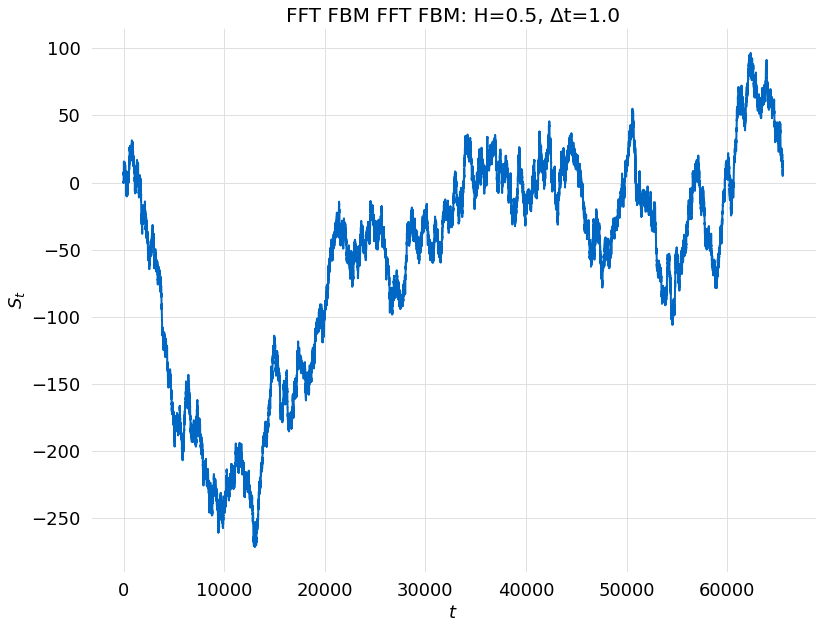

In [4]:
curve(dfs[0])

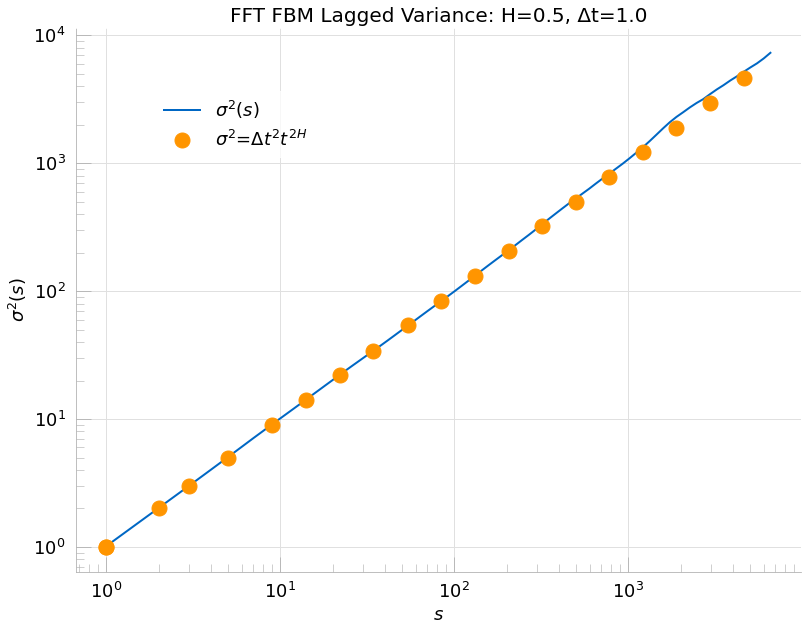

In [5]:
lag_var_plot(dfs[0], H_vals[0], npts)

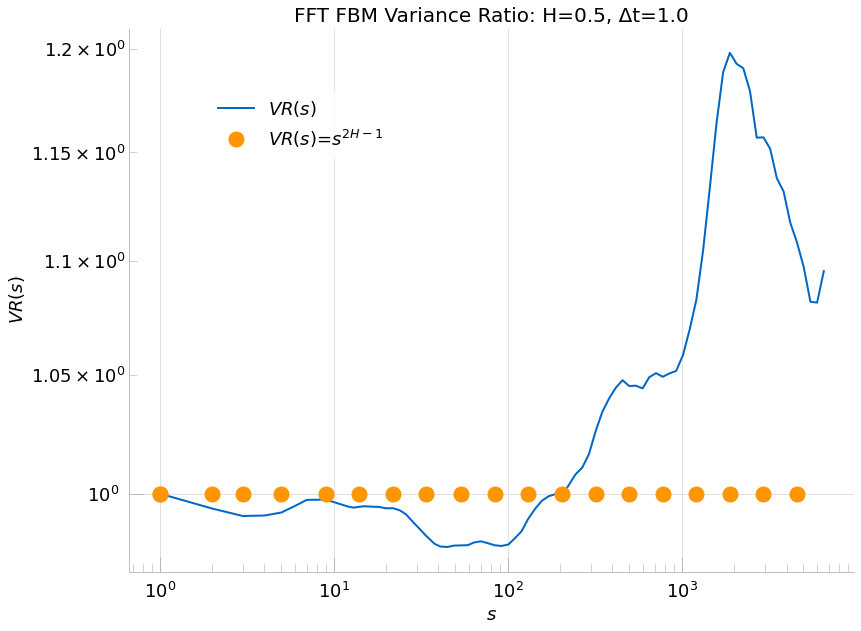

In [6]:
vr_plot(dfs[0], H_vals[0], npts)

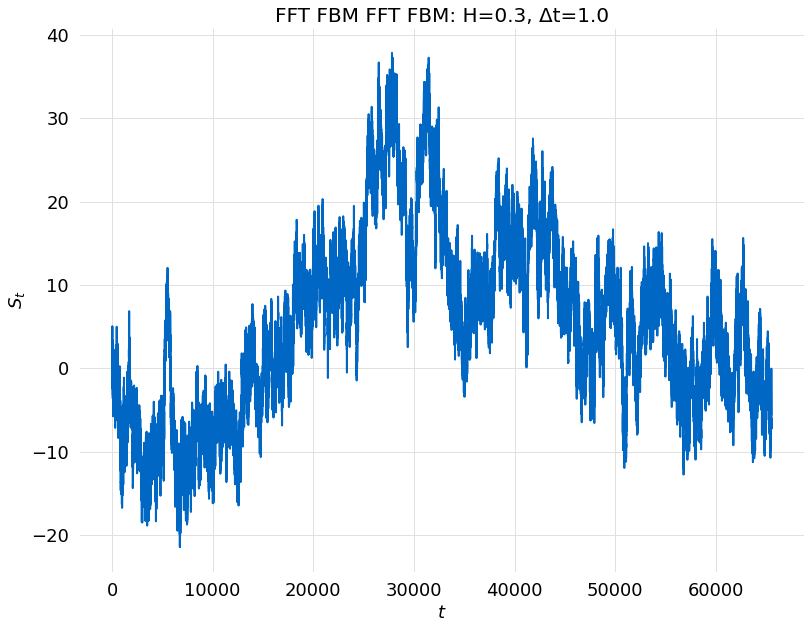

In [7]:
curve(dfs[1])

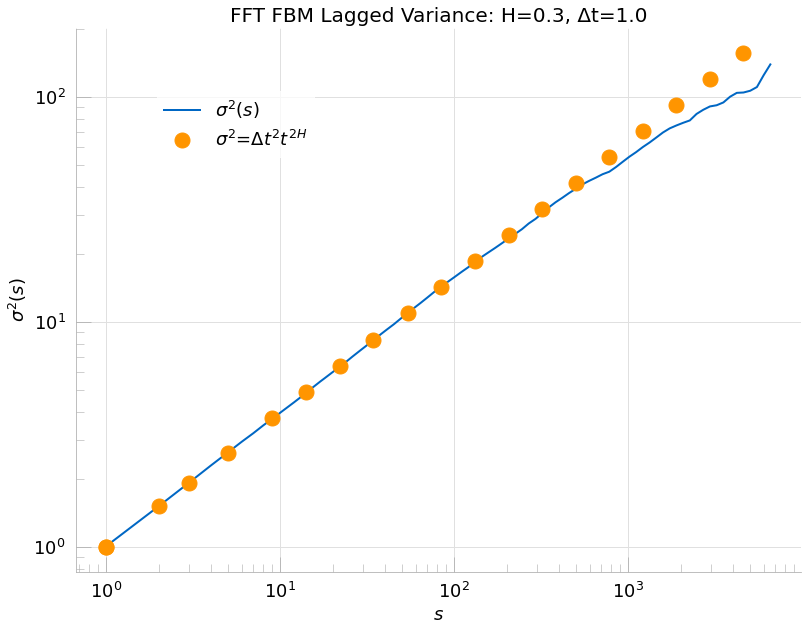

In [8]:
lag_var_plot(dfs[1], H_vals[1], npts)

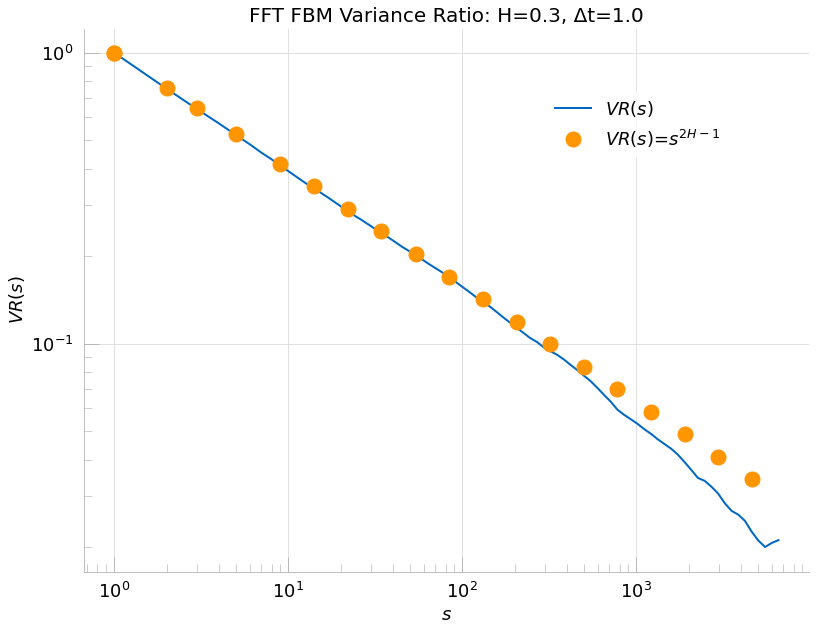

In [9]:
vr_plot(dfs[1], H_vals[1], npts)

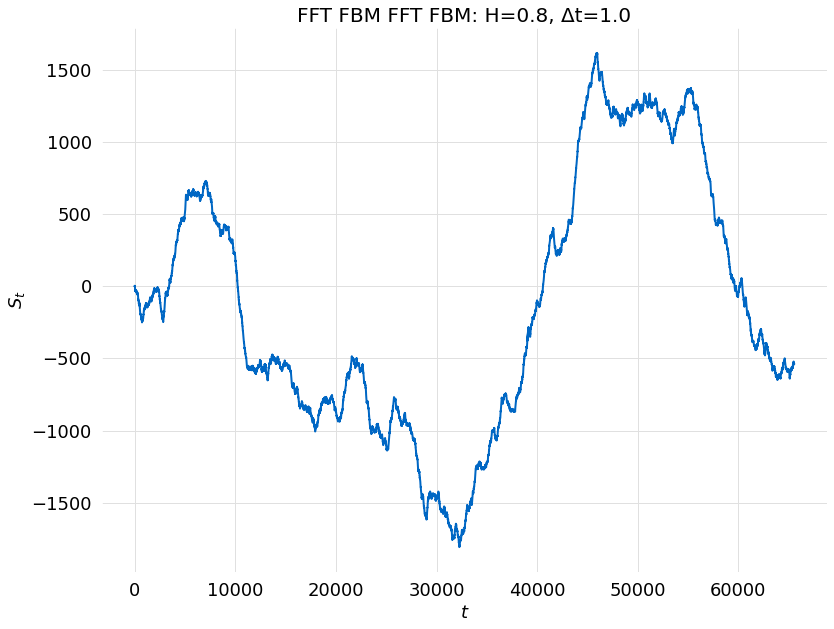

In [10]:
curve(dfs[2])

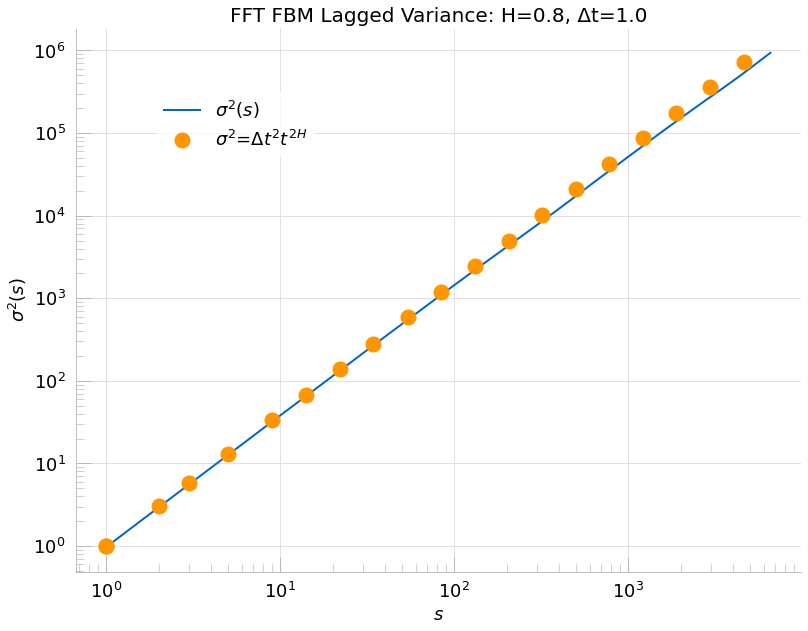

In [11]:
lag_var_plot(dfs[2], H_vals[2], npts)

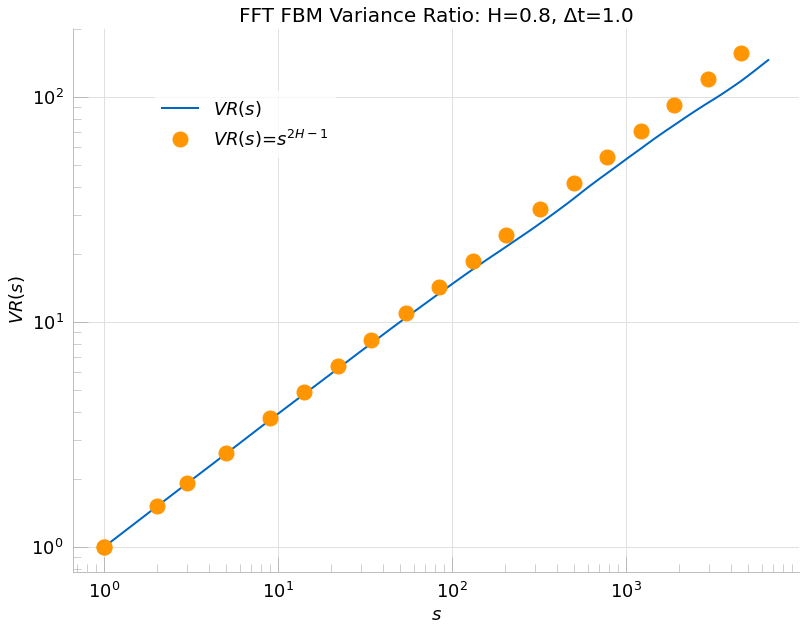

In [12]:
vr_plot(dfs[2], H_vals[2], npts)

## Small Sample Size

In the previous verification section a rather large sample size was used to provide enough data to compute accurate averages. In general</br>
this is not practical. here more realistic sample sizes are used to see the impact on the analysis. 

In [13]:
npts = 2**9
H_vals = [0.5, 0.3, 0.8]
dfs = create(H_vals, npts)

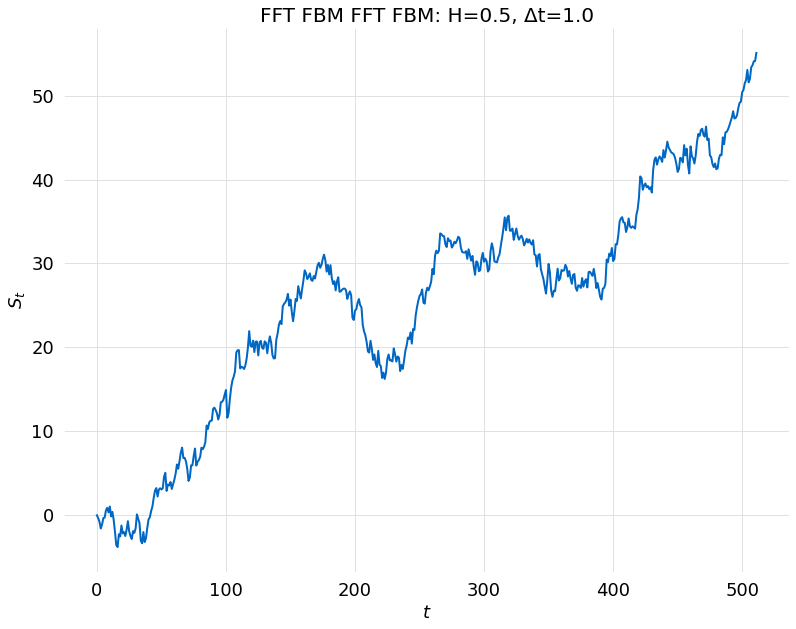

In [14]:
curve(dfs[0])

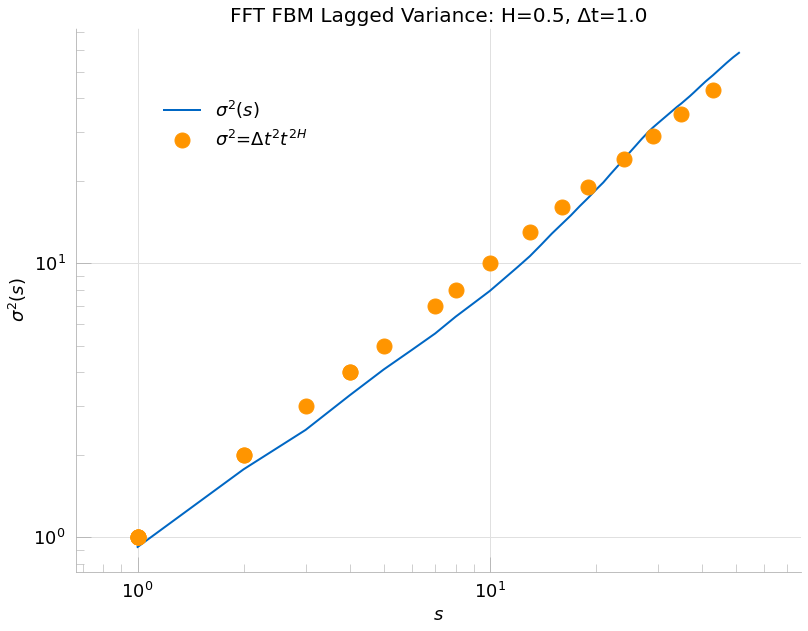

In [15]:
lag_var_plot(dfs[0], H_vals[0], npts)

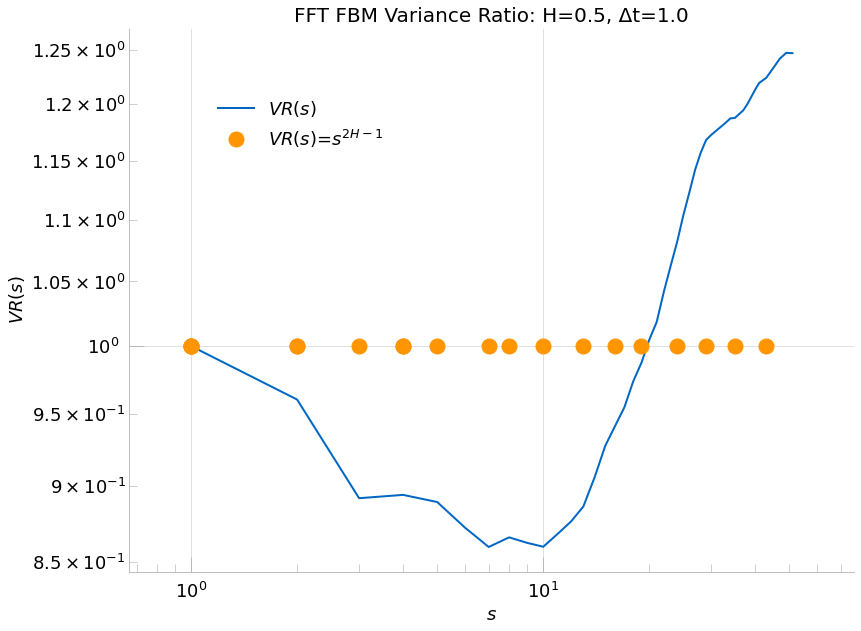

In [16]:
vr_plot(dfs[0], H_vals[0], npts)

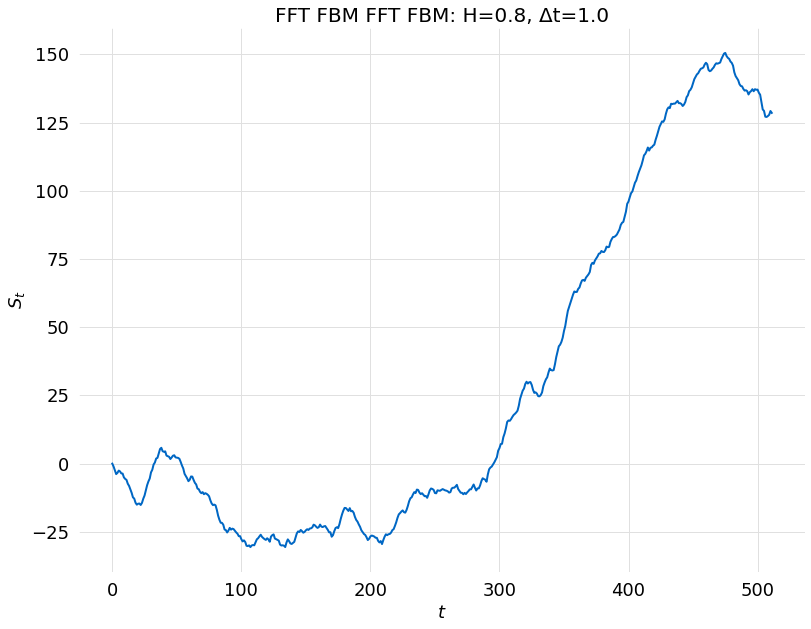

In [17]:
curve(dfs[2])

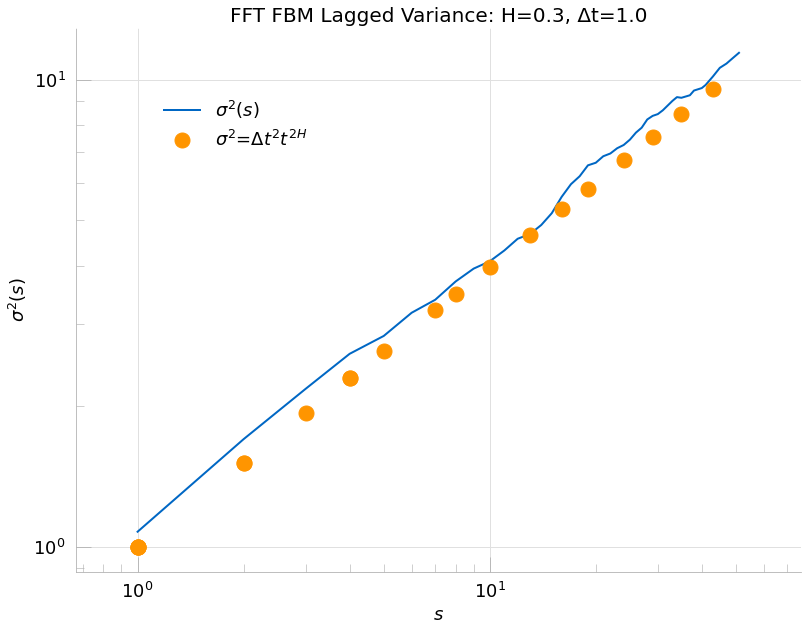

In [18]:
lag_var_plot(dfs[1], H_vals[1], npts)

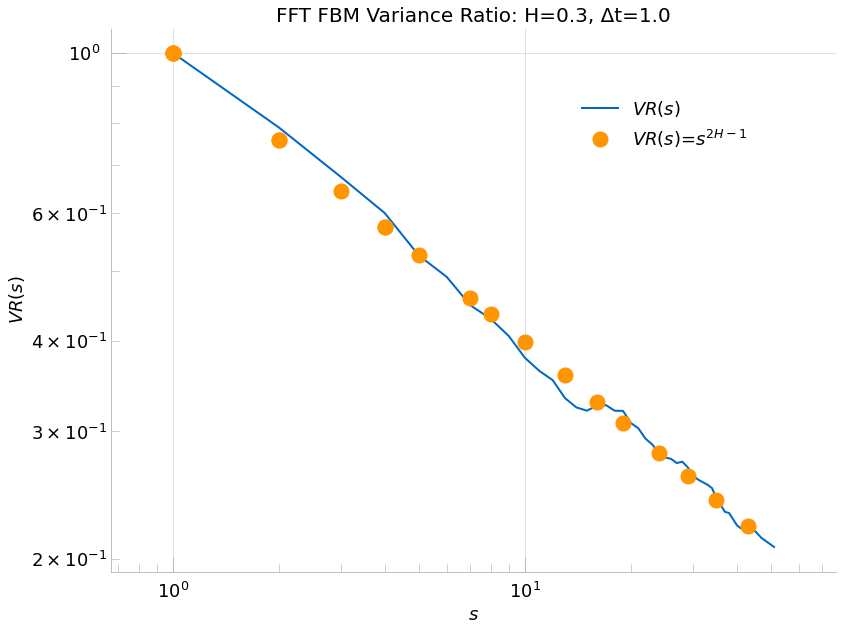

In [19]:
vr_plot(dfs[1], H_vals[1], npts)

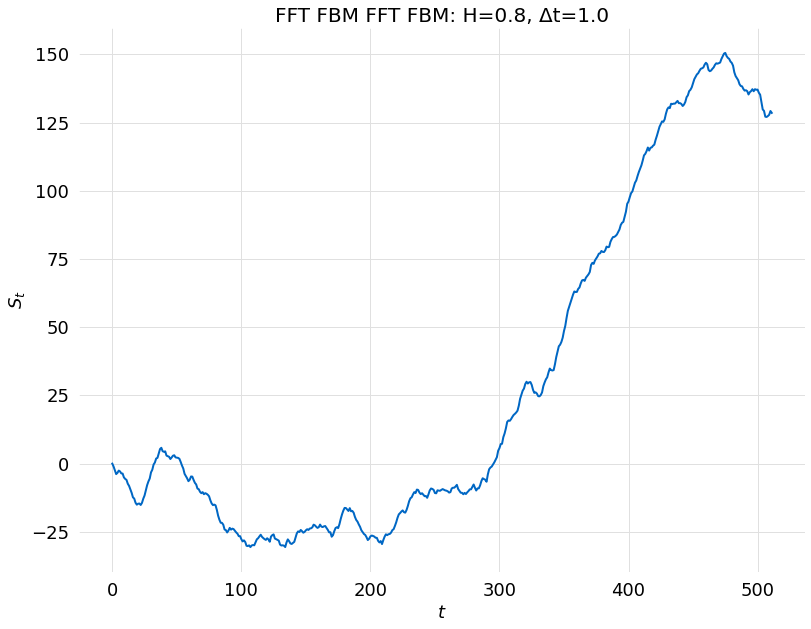

In [20]:
curve(dfs[2])

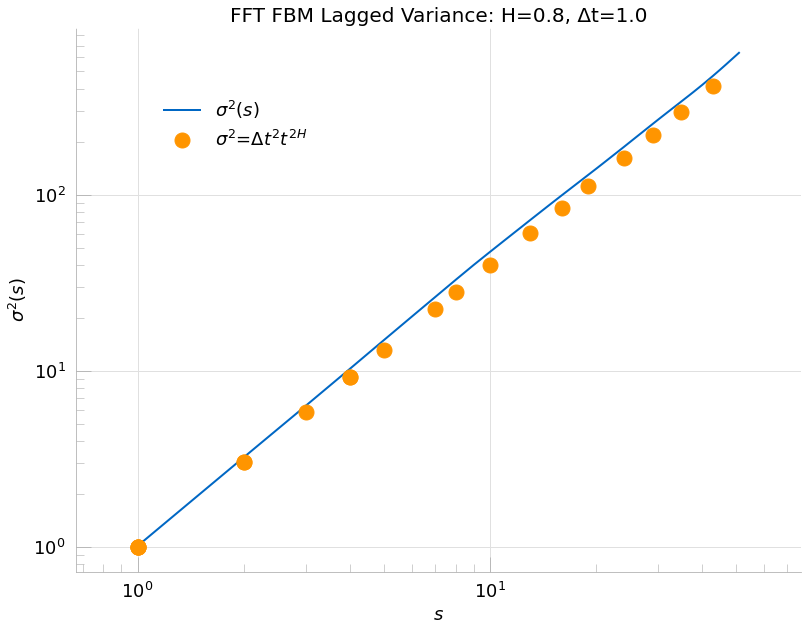

In [21]:
lag_var_plot(dfs[2], H_vals[2], npts)

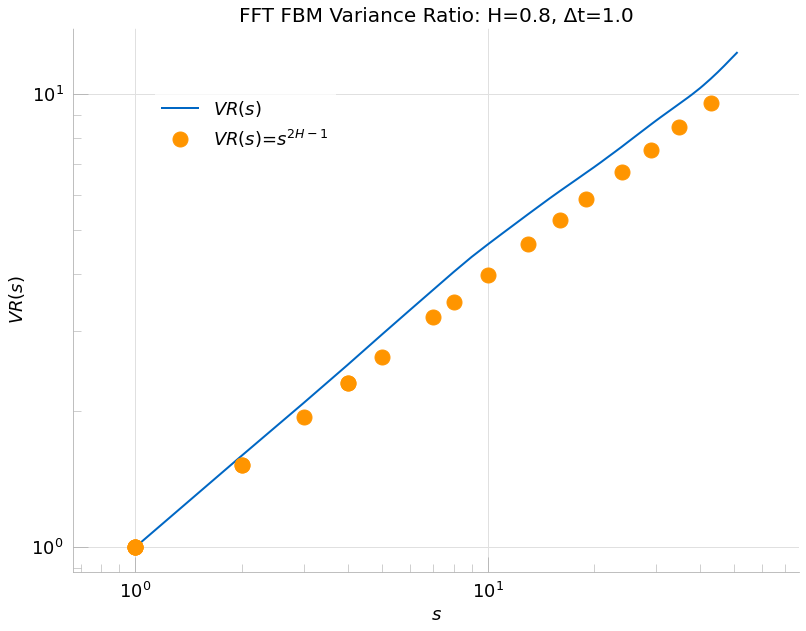

In [22]:
vr_plot(dfs[2], H_vals[2], npts)

## Variance Ratio Test Statistic

In this section simulations that test the homoscedastic and heteroscedastic variance ratio test statistic are presented. First large time series are</br>
analyzed followed by more realistic series lengths. A range of $H$ values is used.

In [23]:
npts = 2**16
s_vals = [2, 10, 100, 1000]
H_vals = [0.5, 0.3, 0.7]
dfs = create(H_vals, npts)

### H = 0.5 

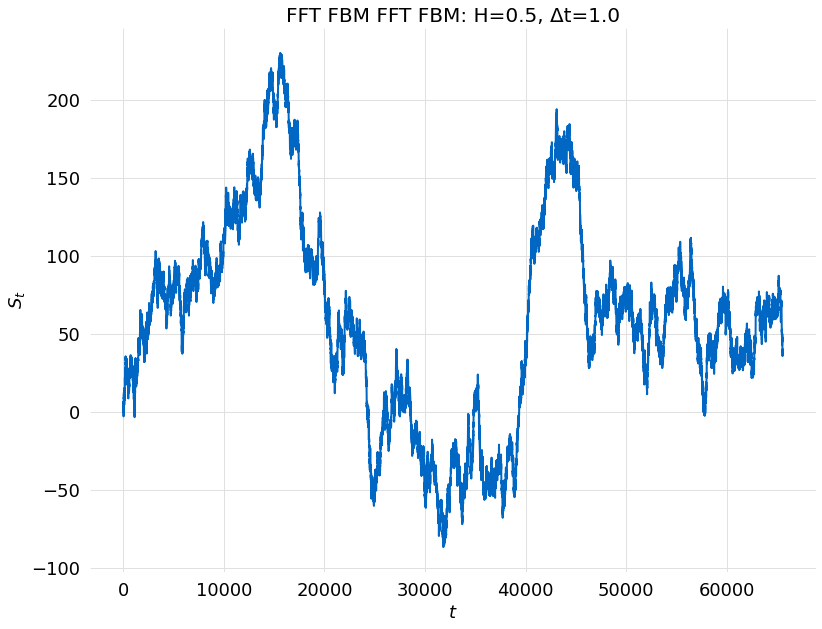

In [24]:
curve(dfs[0])

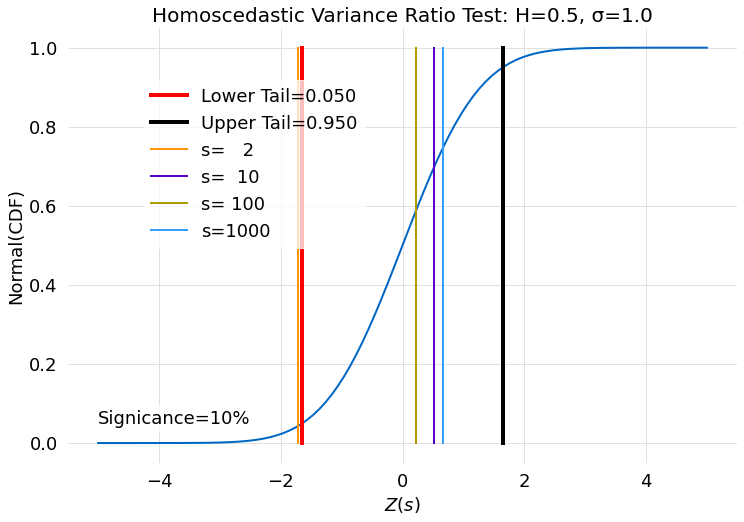

In [25]:
homo_test_stat_plot(s_vals, dfs[0], H_vals[0])

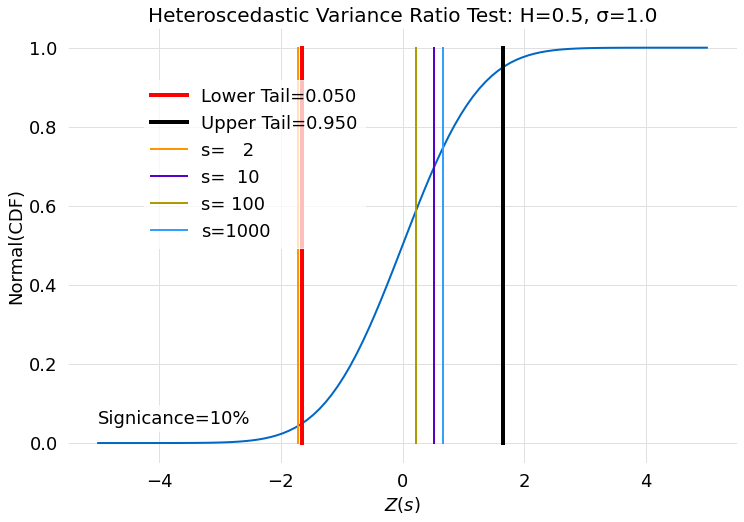

In [26]:
hetero_test_stat_plot(s_vals, dfs[0], H_vals[0])

### H = 0.3

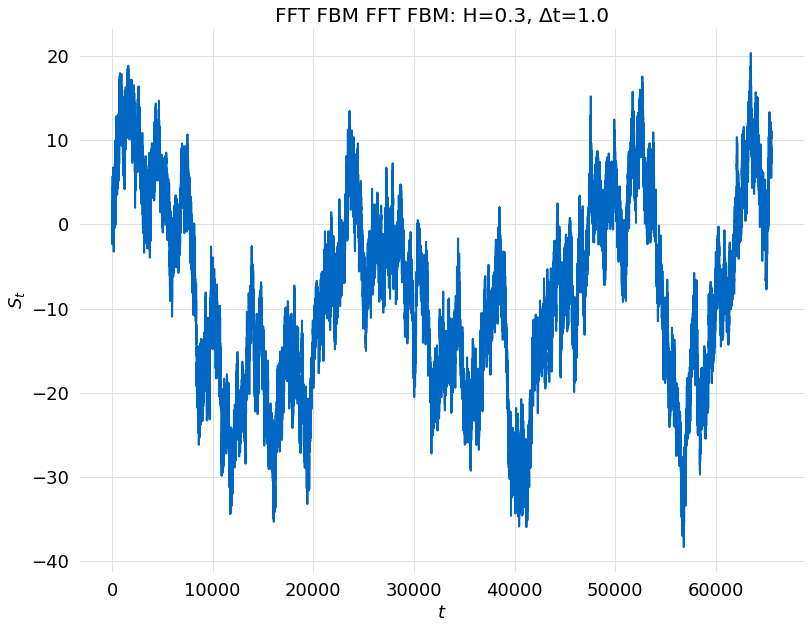

In [27]:
curve(dfs[1])

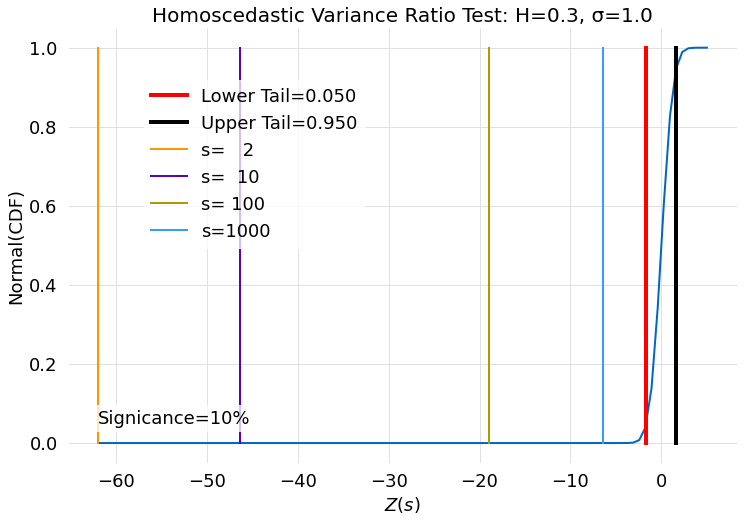

In [28]:
homo_test_stat_plot(s_vals, dfs[1], H_vals[1])

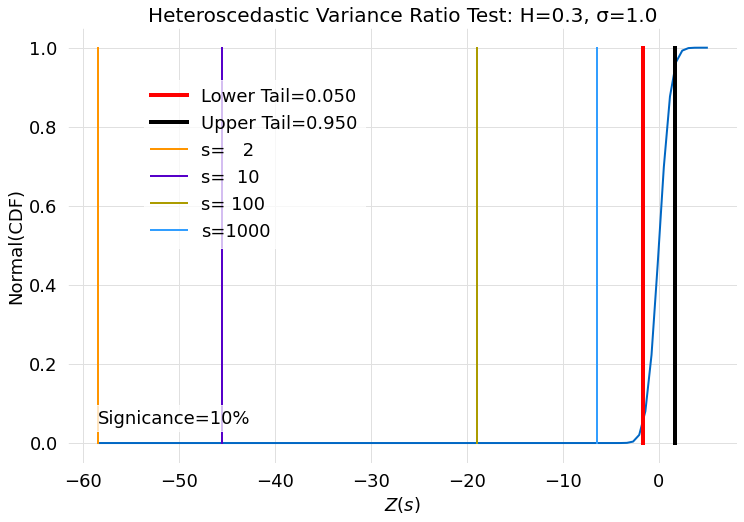

In [29]:
hetero_test_stat_plot(s_vals, dfs[1], H_vals[1])

### H=0.7

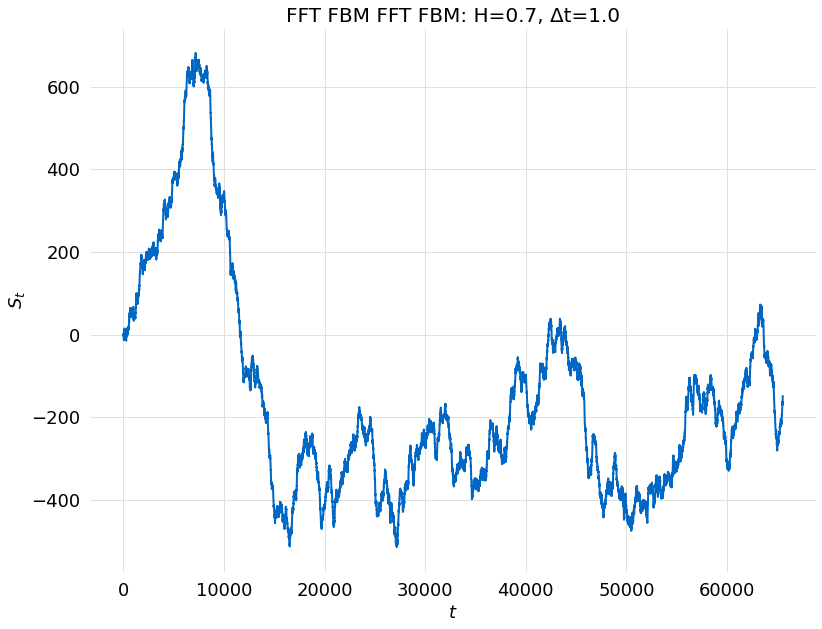

In [30]:
curve(dfs[2])

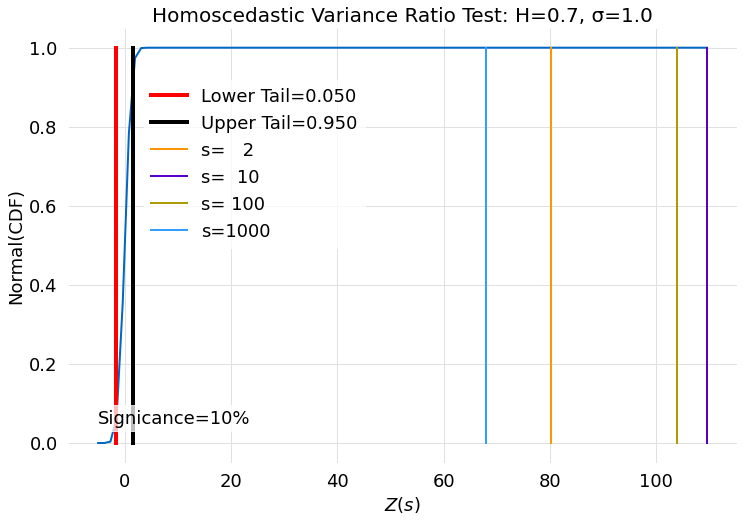

In [31]:
homo_test_stat_plot(s_vals, dfs[2], H_vals[2])

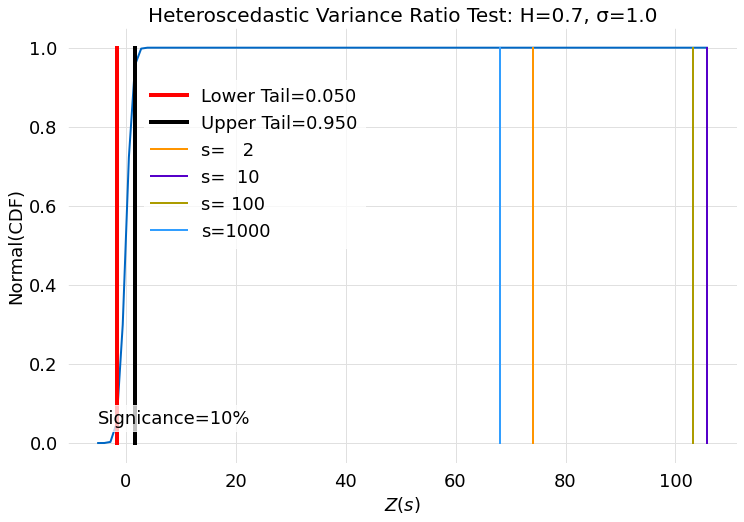

In [32]:
hetero_test_stat_plot(s_vals, dfs[2], H_vals[2])

### Values Near H=0.5

In [33]:
npts = 2**16
s_vals = [2, 10, 100, 1000]
H_vals = [0.475, 0.49, 0.51, 0.525]
dfs = create(H_vals, npts)

#### H=0.51

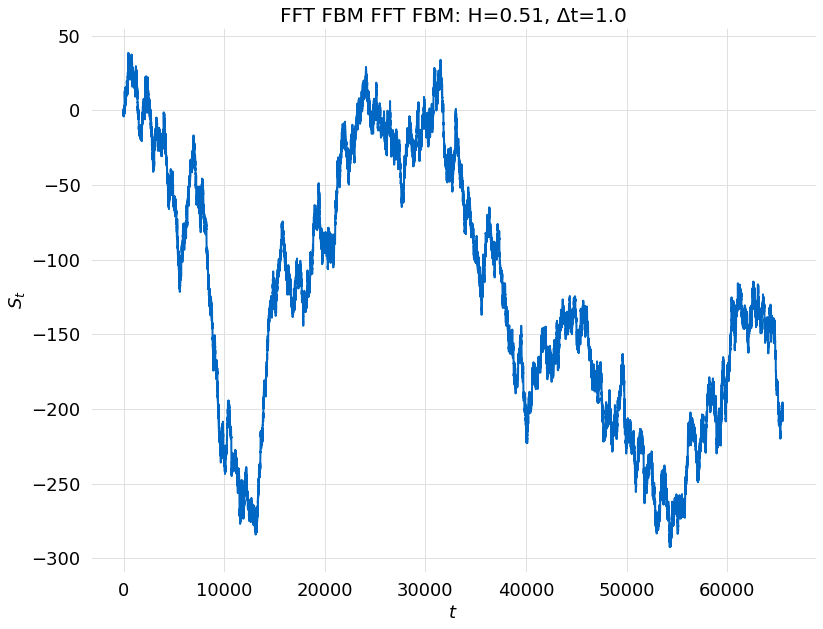

In [34]:
curve(dfs[2])

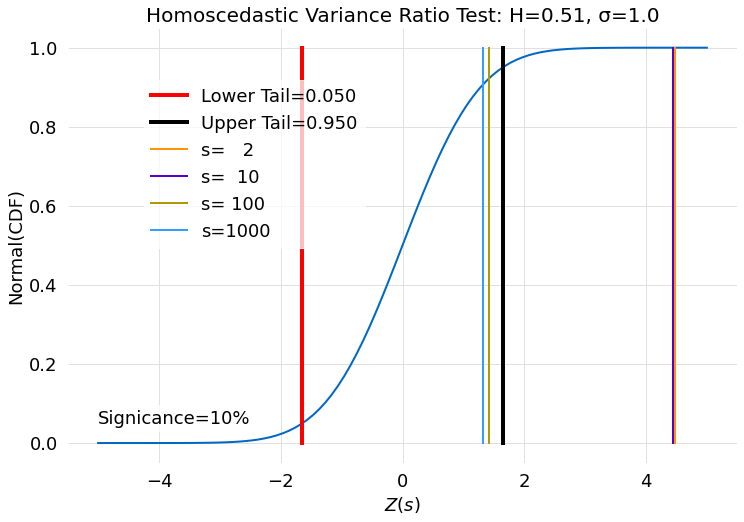

In [35]:
homo_test_stat_plot(s_vals, dfs[2], H_vals[2])

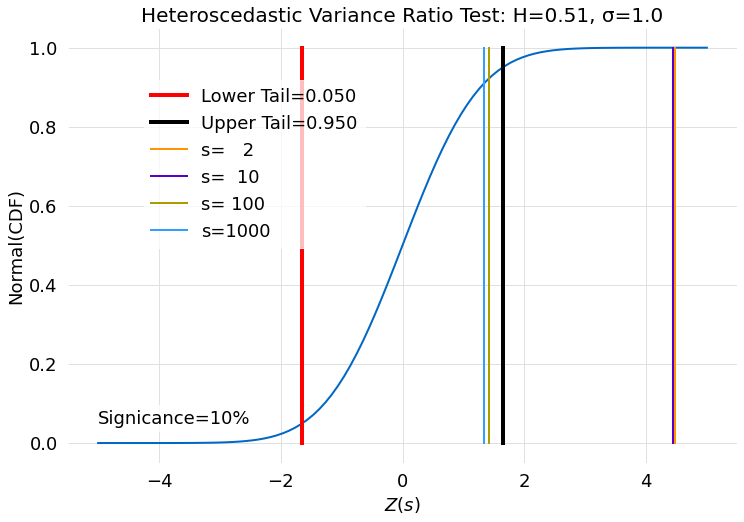

In [36]:
hetero_test_stat_plot(s_vals, dfs[2], H_vals[2])

#### H=0.49

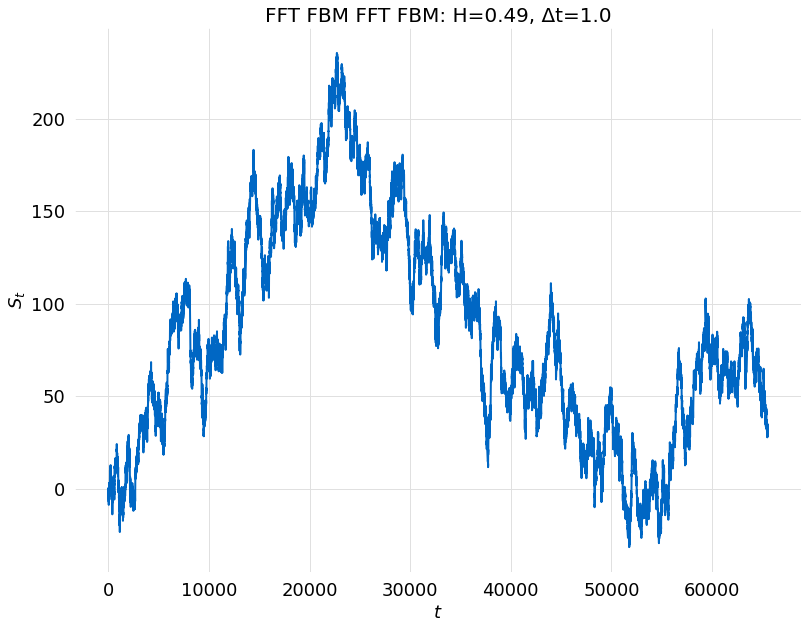

In [37]:
curve(dfs[1])

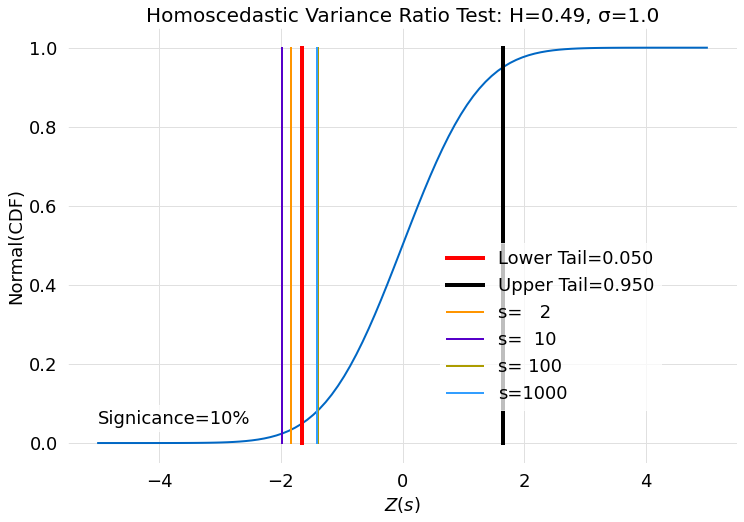

In [38]:
homo_test_stat_plot(s_vals, dfs[1], H_vals[1])

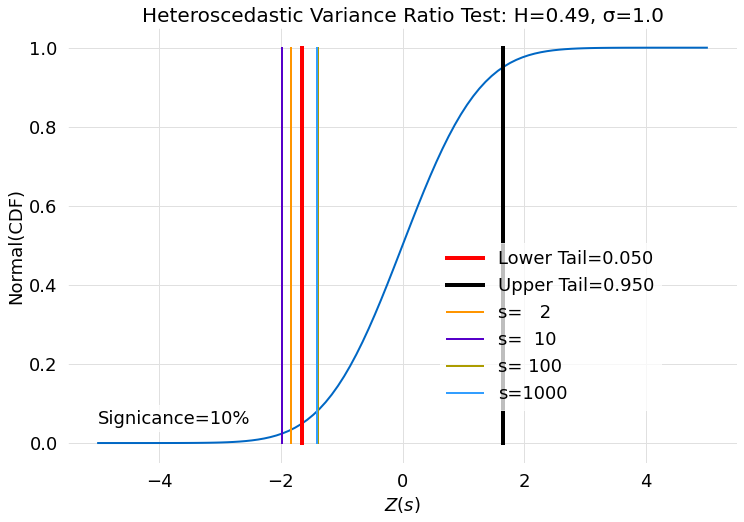

In [39]:
hetero_test_stat_plot(s_vals, dfs[1], H_vals[1])

#### H=0.475

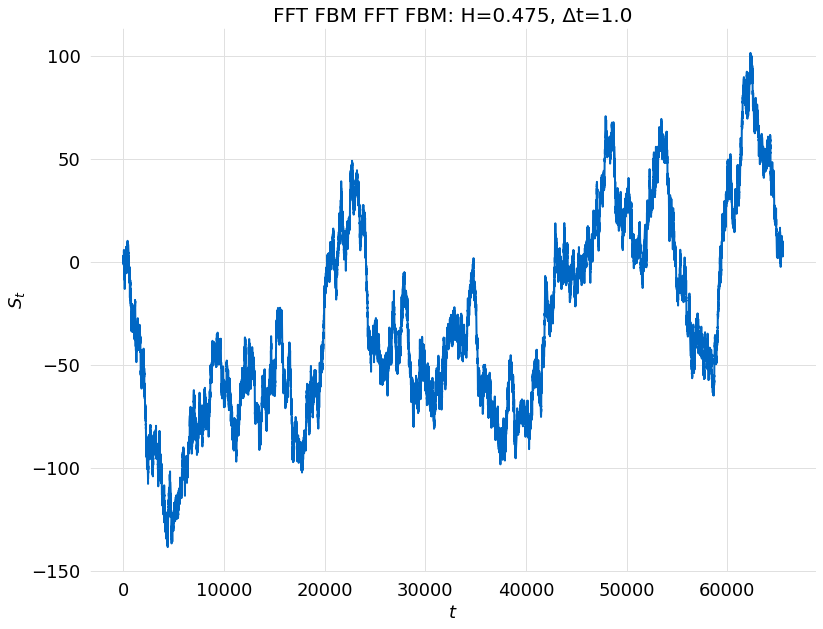

In [40]:
curve(dfs[0])

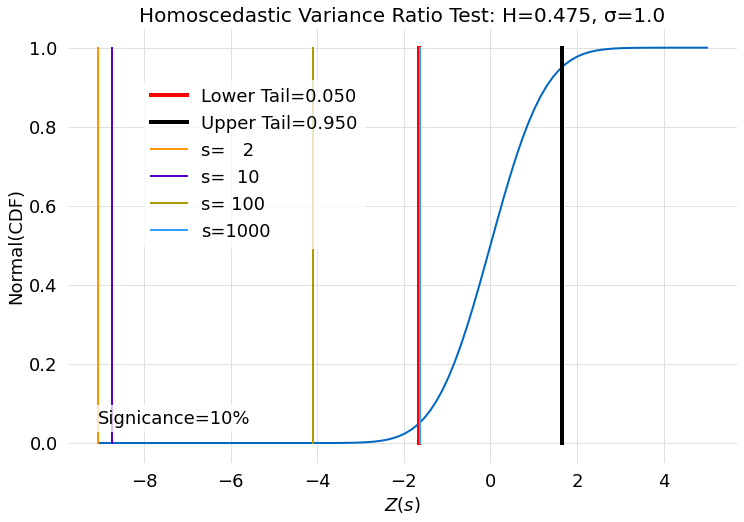

In [41]:
homo_test_stat_plot(s_vals, dfs[0], H_vals[0])

In [ ]:
hetero_test_stat_plot(s_vals, dfs[0], H_vals[0])

### Small Sample Size

In [ ]:
npts = 2**9
s_vals = [4, 10, 25, 50, 100]
H_vals = [0.5, 0.7, 0.3]
dfs = create(H_vals, npts)

#### H=0.5

In [ ]:
curve(dfs[0])

In [ ]:
homo_test_stat_plot(s_vals, dfs[0], H_vals[0])

In [ ]:
hetero_test_stat_plot(s_vals, dfs[0], H_vals[0])

#### H=0.7

In [ ]:
curve(dfs[1])

In [ ]:
homo_test_stat_plot(s_vals, dfs[1], H_vals[1])

In [ ]:
hetero_test_stat_plot(s_vals, dfs[1], H_vals[1])

#### H=0.3

In [ ]:
curve(dfs[2])

In [ ]:
homo_test_stat_plot(s_vals, dfs[2], H_vals[2])

In [ ]:
hetero_test_stat_plot(s_vals, dfs[2], H_vals[2])

### Values Near H=0.5

In [ ]:
npts = 2**9
s_vals = [2, 4, 10, 25, 50]
H_vals = [0.49, 0.45, 0.4, 0.51, 0.55]
dfs = create(H_vals, npts)

#### H=0.49

In [ ]:
curve(dfs[0])

In [ ]:
homo_test_stat_plot(s_vals, dfs[0], H_vals[0])

In [ ]:
hetero_test_stat_plot(s_vals, dfs[0], H_vals[0])

#### H=0.45

In [ ]:
curve(dfs[1])

In [ ]:
homo_test_stat_plot(s_vals, dfs[1], H_vals[1])

In [ ]:
hetero_test_stat_plot(s_vals, dfs[1], H_vals[1])

#### H=0.4

In [ ]:
curve(dfs[2])

In [ ]:
homo_test_stat_plot(s_vals, dfs[2], H_vals[2])

In [ ]:
hetero_test_stat_plot(s_vals, dfs[2], H_vals[2])

#### H=0.51

In [ ]:
curve(dfs[3])

In [ ]:
homo_test_stat_plot(s_vals, dfs[3], H_vals[3])

In [ ]:
hetero_test_stat_plot(s_vals, dfs[3], H_vals[3])

#### H=0.55

In [ ]:
curve(dfs[4])

In [ ]:
homo_test_stat_plot(s_vals, dfs[4], H_vals[4])

In [ ]:
hetero_test_stat_plot(s_vals, dfs[4], H_vals[4])

## Variance Ratio Test

Here the performance of the variance ratio test is evaluated. In the previous analysis the performance of the homoscedastic test was not significantly different</br>
than the heteroscedastic test. Since the homoscedastic test is much faster it is used. The values of the variance ratio test statistic for $0 < H < \frac{1}{2}$, $H=\frac{1}{2}$</br>
and $\frac{1}{2} < H < 1$ respectively satisfy $Z(s) < 0$, $Z(s) = 0$ and $Z(s) > 0$. This follows from the variance ratio, $\text{VR}(s)$ satisfying $0 < \text{VR}(s) < 1$, $\text{VR}(s)=1$ and $\text{VR}(s) > 1$</br>
in that same regions. Plots of $Z(s)$ for these regions are shown below. It is seen for $0 < H < \frac{1}{2}$ that $Z(s)$ is an increasing function of $s$ and for $\frac{1}{2} < H < 1$</br>
$Z(s)$ has a more complex behavior but is increasing for smaller values of $s$. It follows that eventually for some value of $s$ the test will likely fail. This makes interpreting the tests</br> 
results somewhat difficult. In the previous analysis where $\text{VR}(s)$ was compared to $\sigma s^{2H-1}$ it was seen that for a series with $2^9$ points the the two values agreed well for</br>
up to $s=2^8$. This motivates evaluating $Z(s)$ in regions where it is always increasing using a sequence of values of $s$ satisfying $s \le 25$. For this range the agreement between $\text{VR}(s)$</br>
and $\sigma s^{2H-1}$ was best. $Z(s)$ is evaluated for each $s$ and the result is pass if at least one test passes and failed otherwise.

### $H \le \frac{1}{2}$

In [ ]:
npts = 2**9
s_min=2.0
s_max=npts/2
s_npts=int(s_max-s_min+1)

In [ ]:
H_vals = [0.1, 0.2, 0.3, 0.4, 0.5]
dfs = create(H_vals, npts)
stats = FBM.Func.VR_STAT.apply_to_list(dfs, s_min=s_min, s_max=s_max, npts=s_npts, linear=True)

In [ ]:
title = r"Variance Ratio Statistic"
comparison(stats, title=title, labels=H_labels(H_vals))

### $H \ge \frac{1}{2}$

In [ ]:
H_vals = [0.5, 0.6, 0.7, 0.8, 0.89]
dfs = create(H_vals, npts)
stats = FBM.Func.VR_STAT.apply_to_list(dfs, s_min=s_min, s_max=s_max, npts=s_npts, linear=True)

In [ ]:
title = r"Variance Ratio Statistic"
s = numpy.tile(s_vals, (len(H_vals), 1))
comparison(stats, title=title, labels=H_labels(H_vals))

### $H = 0.5$

Here a two tailed test for brownian motion is performed. This test is successful if the result is **PASSED**

In [ ]:
H=0.5
df=FBM.Source.MOTION_FFT.create(H=H, npts=npts)
result=FBM.Test.BM.perform(df)
result.summary()

In [ ]:
result=FBM.Test.AUTO_CORR.perform(df)
result.summary()

In [ ]:
result=FBM.Test.NEG_AUTO_CORR.perform(df)
result.summary()

In [ ]:
df.attrs

In [ ]:
homo_test_stat_plot([4, 6, 10, 16, 24], df, H, test_type=TestHypothesis.TWO_TAIL, sig_level=0.1)

### $H = 0.4$

Here a lower tail test is performed for fractional brownian with $H<\frac{1}{2}$. The test is successful if the result is **Failed**.

In [ ]:
H=0.4
df=FBM.Source.MOTION_FFT.create(H=H, npts=npts)
result=FBM.Test.BM.perform(df)
result.summary()

In [ ]:
result=FBM.Test.AUTO_CORR.perform(df)
result.summary()

In [ ]:
result=FBM.Test.NEG_AUTO_CORR.perform(df)
result.summary()

In [ ]:
df.attrs

In [ ]:
homo_test_stat_plot([4, 6, 10, 16, 24], df, H, test_type=TestHypothesis.LOWER_TAIL, sig_level=0.1)

### $H = 0.6$

Here an upper tailed test for fractional brownian motion with $H > \frac{1}{2}$. The test is successful if the result is **Failed**.

In [ ]:
H=0.6
df=FBM.Source.MOTION_FFT.create(H=H, npts=npts)
result=FBM.Test.BM.perform(df)
result.summary()

In [ ]:
result=FBM.Test.AUTO_CORR.perform(df)
result.summary()

In [ ]:
result=FBM.Test.NEG_AUTO_CORR.perform(df)
result.summary()

In [ ]:
df.attrs

In [ ]:
homo_test_stat_plot([4, 6, 10, 16, 24], df, H, test_type=TestHypothesis.TWO_TAIL, sig_level=0.1)